In [7]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat1.csv")

In [9]:
data.head()

Unnamed: 0  from_city_id  online_booking  mobile_site_booking  \
0           6          15.0               0                    0   
1          17          15.0               1                    0   
2          24          15.0               0                    0   
3         158           1.0               1                    0   
4         216          15.0               1                    0   

   Car_Cancellation  from_datee  booking_month  weekend  timeOfDay  \
0                 0           1              1        0          2   
1                 0          12              1        1          1   
2                 0           5              1        1          1   
3                 0           4              1        0          2   
4                 0           6              1        1          1   

   timeDifference  cancel_zone  
0               0            1  
1              -4            0  
2              -6            0  
3              -3            0  
4              -2            0

In [10]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

from_city_id  online_booking  mobile_site_booking  Car_Cancellation  \
0          15.0               0                    0                 0   
1          15.0               1                    0                 0   
2          15.0               0                    0                 0   

   from_datee  booking_month  weekend  timeOfDay  timeDifference  cancel_zone  
0           1              1        0          2               0            1  
1          12              1        1          1              -4            0  
2           5              1        1          1              -6            0

In [11]:
data.shape

(1589, 10)

In [12]:
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [13]:
names =['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],

dx = ['Cancel', 'notCancel']

In [14]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[ 15.,   0.,   0., ...,   2.,   0.,   1.],
       [ 15.,   1.,   0., ...,   1.,  -4.,   0.],
       [ 15.,   0.,   0., ...,   1.,  -6.,   0.],
       ...,
       [ 15.,   1.,   0., ...,   1., -16.,   0.],
       [ 15.,   0.,   0., ...,   2.,   3.,   1.],
       [ 15.,   0.,   0., ...,   3.,   4.,   0.]])

In [15]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (1589, 9)
Shape of target Y:  (1589,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [18]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (953, 9)
Data of testing features:  (636, 9)


Data of training target:  (953,)
Data of testing target:  (636,)


In [19]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [20]:
x_train

array([[ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
         0.32403891, -0.78483716],
       [ 0.23792135,  1.16823126, -0.14262753, ...,  0.57456113,
         0.05362816, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ...,  1.79270743,
         1.27047656, -0.78483716],
       ...,
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.2167826 , -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.03451201,
        -0.62239874, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.48719336, -0.78483716]])

In [21]:
x_test

array([[ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.55584048, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -1.22284905,  1.22699765],
       [ 4.48279419, -0.87559504,  7.53778361, ..., -0.6764421 ,
        -0.02223362, -0.77395236],
       ...,
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.10661803,
         1.17838181, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.28903705, -0.77395236],
       [ 0.24251592,  1.14208048, -0.13266499, ..., -0.6764421 ,
        -1.08944733, -0.77395236]])

In [22]:
#Model 1 - Logistic Regression
model_logreg = LogisticRegression(random_state=0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = model_logreg.predict(x_test)
y_pred[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
y_test[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
conf_matrix_logreg = confusion_matrix(y_test,y_pred)
conf_matrix_logreg

array([[629,   0],
       [  5,   2]], dtype=int64)

<Axes: >

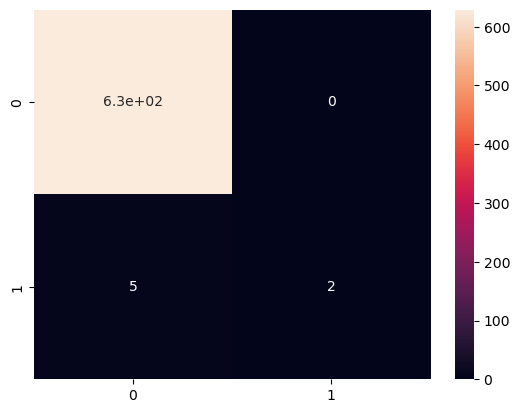

In [26]:
sns.heatmap(conf_matrix_logreg,annot=True)

In [27]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9921383647798742

In [28]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

1.0

In [29]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.2857142857142857

In [30]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
auc_logreg = metrics.roc_auc_score(y_test,y_pred_proba)
auc_logreg

0.9266409266409267

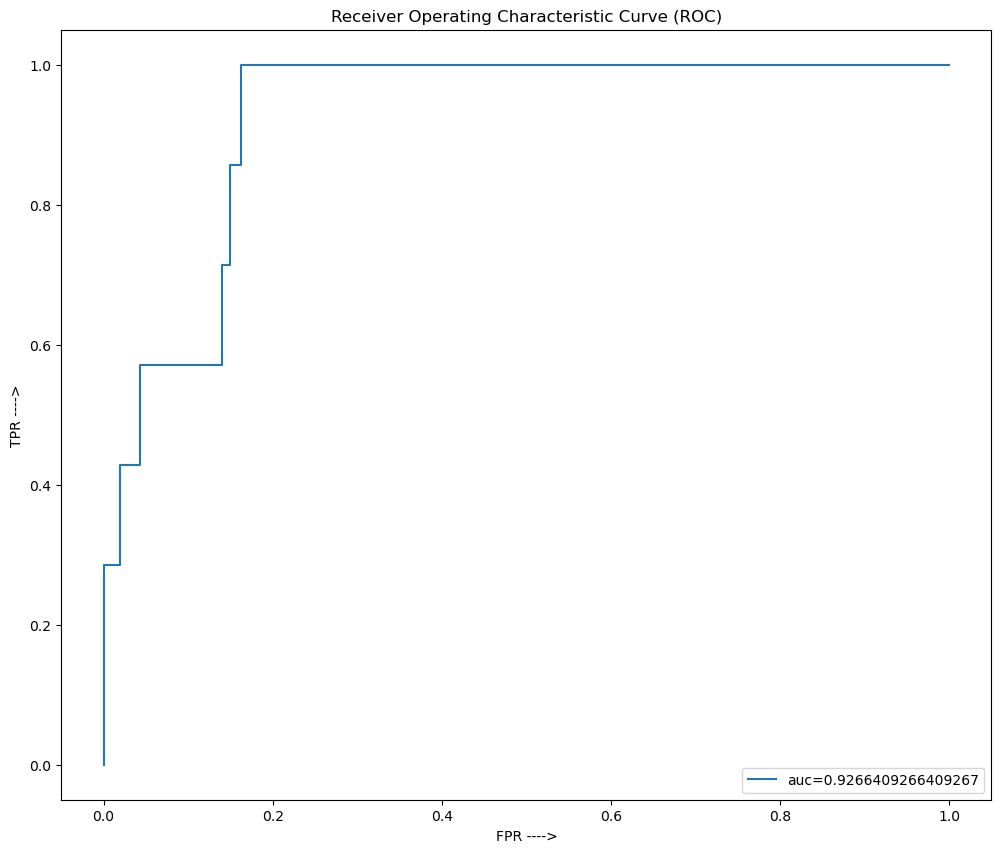

In [31]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [32]:
model_dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt2.fit(x_train,y_train)

model_dt2_score_train = model_dt2.score(x_train,y_train)

model_dt2_score_test = model_dt2.score(x_test,y_test)

print('Training Score',model_dt2_score_train)

print('Testing Score',model_dt2_score_test)

Training Score 0.9863588667366212
Testing Score 0.9874213836477987


In [33]:
model_dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt4.fit(x_train,y_train)

model_dt4_score_train = model_dt4.score(x_train,y_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)

print('Training Score',model_dt4_score_train)

print('Testing Score',model_dt4_score_test)

Training Score 0.9884575026232949
Testing Score 0.9827044025157232


In [34]:
model_dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt6.fit(x_train,y_train)

model_dt6_score_train = model_dt6.score(x_train,y_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)

print('Training Score',model_dt6_score_train)

print('Testing Score',model_dt6_score_test)

Training Score 0.9958027282266527
Testing Score 0.9858490566037735


In [35]:
model_dt8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt8.fit(x_train,y_train)

model_dt8_score_train = model_dt8.score(x_train,y_train)

model_dt8_score_test = model_dt8.score(x_test,y_test)

print('Training Score',model_dt8_score_train)

print('Testing Score',model_dt8_score_test)

Training Score 0.9989506820566632
Testing Score 0.9842767295597484


In [36]:
model_dt4 = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt4.fit(x_train,y_train)

y_pred_dt4 = model_dt4.predict(x_test)
y_pred_proba_dt4 = model_dt4.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt4_score_train = model_dt4.score(x_train,y_train)
print(model_dt4_score_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)
print(model_dt4_score_test)

0.9853095487932844
0.9889937106918238


In [37]:
y_pred_dt4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
predictions = model_dt4.predict(x_test)
print(model_dt4.score(x_test,y_test))
y_actual_result = y_test[0]

0.9889937106918238


In [39]:
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt4)
conf_matrix_dt

array([[629,   0],
       [  7,   0]], dtype=int64)

<Axes: >

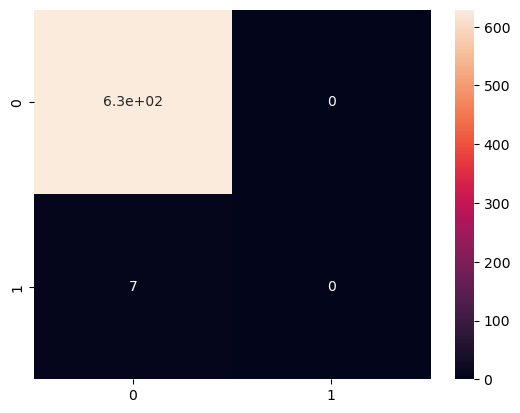

In [40]:
sns.heatmap(conf_matrix_dt,annot=True)

In [41]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt4)
accuracy_dt

0.9889937106918238

In [42]:
precision_dt = metrics.precision_score(y_test,y_pred_dt4)
precision_dt

0.0

In [43]:
recall_dt = metrics.recall_score(y_test,y_pred_dt4)
recall_dt

0.0

In [44]:
y_pred_proba = model_dt4.predict_proba(x_test)[::,1]
auc_dt = metrics.roc_auc_score(y_test,y_pred_proba)
auc_dt

0.6804451510333863

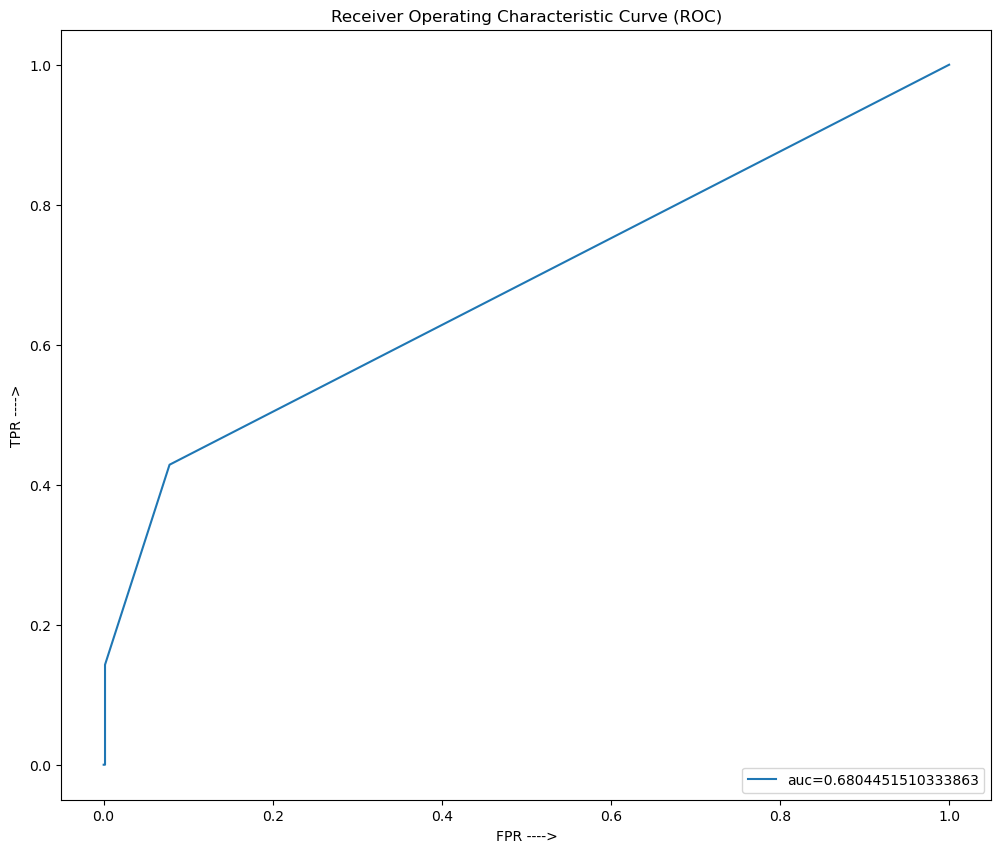

In [45]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [46]:
#Random forest classifier
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [47]:
names = ['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone']

dx = ['Cancel', 'NotCancel']

In [48]:
names_index = names[2:]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=40)

In [50]:
fit_rf = RandomForestClassifier(random_state=40)

In [95]:
np.random.seed(40)
start = time.time()

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)

print('Best Parameters using Grid search: \n',cv_rf.best_params_)

end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search: 57.69


In [100]:
fit_rf.set_params(criterion='gini',max_features = None,max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=1000,
                       oob_score=True, random_state=40, warm_start=True)

In [97]:
#oob
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [103]:
error_rate

{100: 0.012591815320041944,
 101: 0.012591815320041944,
 102: 0.012591815320041944,
 103: 0.012591815320041944,
 104: 0.01364113326337879,
 105: 0.012591815320041944,
 106: 0.012591815320041944,
 107: 0.012591815320041944,
 108: 0.012591815320041944,
 109: 0.012591815320041944,
 110: 0.012591815320041944,
 111: 0.012591815320041944,
 112: 0.012591815320041944,
 113: 0.012591815320041944,
 114: 0.012591815320041944,
 115: 0.012591815320041944,
 116: 0.012591815320041944,
 117: 0.01364113326337879,
 118: 0.01364113326337879,
 119: 0.01364113326337879,
 120: 0.01364113326337879,
 121: 0.01364113326337879,
 122: 0.01364113326337879,
 123: 0.01364113326337879,
 124: 0.01364113326337879,
 125: 0.01364113326337879,
 126: 0.01364113326337879,
 127: 0.01364113326337879,
 128: 0.01364113326337879,
 129: 0.01364113326337879,
 130: 0.012591815320041944,
 131: 0.012591815320041944,
 132: 0.012591815320041944,
 133: 0.012591815320041944,
 134: 0.012591815320041944,
 135: 0.012591815320041944,
 136: 

In [560]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

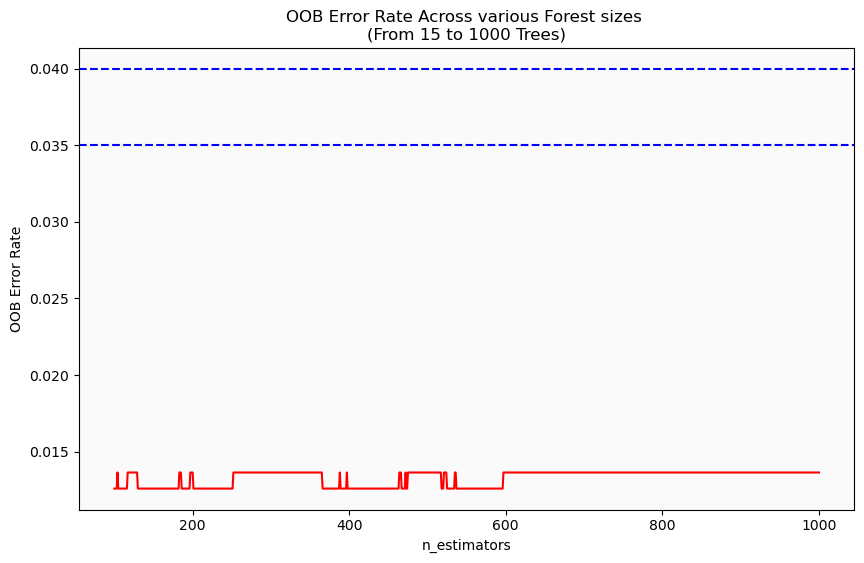

In [561]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [562]:
print('OOB Error rate for 650 trees is: %0.5f'%oob_series[650])

OOB Error rate for 650 trees is: 0.01364


In [563]:
fit_rf.set_params(n_estimators=650,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=650,
                       random_state=40)

In [564]:

model_rf = fit_rf.fit(x_train,y_train)

In [565]:
y_pred_rf = fit_rf.predict(x_test)
print(y_pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [566]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

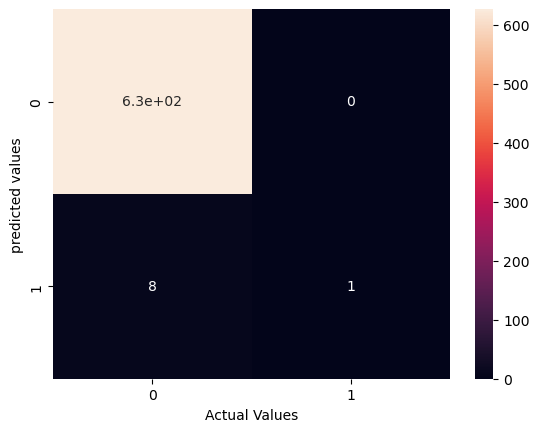

In [567]:
# confusion matrix
con_matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(con_matrix_rf,annot = True)
plt.xlabel('Actual Values')
plt.ylabel('predicted values')
plt.show()

In [568]:
accuracy_rf = model_rf.score(x_test,y_test)
accuracy_rf

0.9874213836477987

In [569]:
precision_rf = metrics.precision_score(y_test,y_pred_rf)
precision_rf

1.0

In [570]:
recall_rf = metrics.recall_score(y_test,y_pred_rf)
recall_rf

0.1111111111111111

In [571]:
#AUC
predictions_proba = model_rf.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)


In [572]:
auc_rf = metrics.auc(fpr2,tpr2)
auc_rf

0.8799397483608009

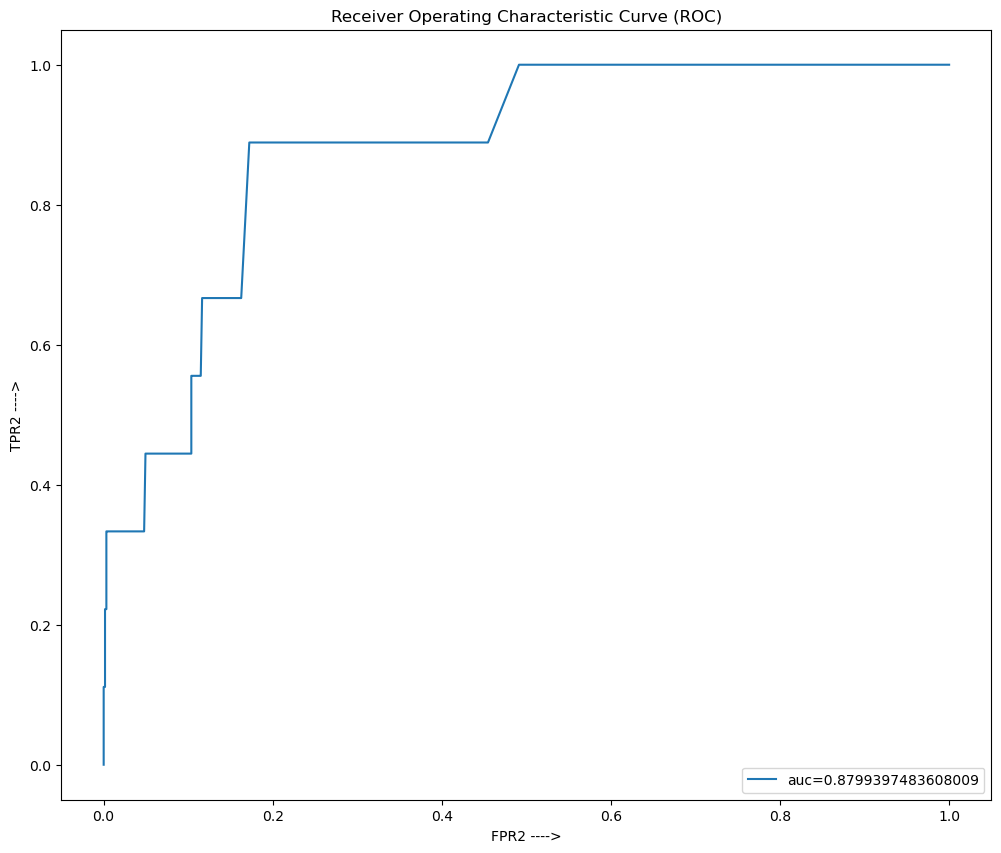

In [573]:
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr2,tpr2,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR2 ---->")
plt.ylabel("TPR2 ---->")
plt.show()

In [574]:
#Model 5 : Grdient Booster 
fit_gb = GradientBoostingClassifier(random_state = 40 )

In [575]:
# Hyper parameter tuning 
np.random.seed(40)
start = time.time()
parameters={

    'n_estimators' :[50,100,500],
    'learning_rate' : [0.001,0.1,1],
    'criterion' : ['friedman_mse','squared_error'],
    'max_features' : ['sqrt','log2'],
    'loss' : ['log_logs','exponential'],
    'max_depth':[2,3,4,5]
}

cv_gb = GridSearchCV(fit_gb,param_grid = parameters,cv = 10,n_jobs = 3)
cv_gb.fit(x_train,y_train)

print(cv_gb.best_params_)
end = time.time()
print("time taken to execute: %0.2f"%(end-start))
    

{'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
time taken to execute: 141.40


In [576]:
model_gb = fit_gb.set_params(
    n_estimators =100,
    criterion = 'friedman_mse',
    learning_rate = 1 ,
    max_features = 'sqrt',
    loss = 'exponential',
    max_depth = 3)




In [577]:
fit_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           max_features='sqrt', random_state=40)

In [578]:
y_pred_gb = fit_gb.predict(x_test)

In [579]:
y_pred_gb


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [580]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

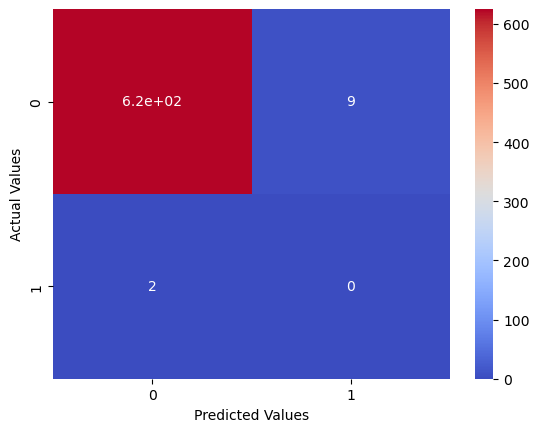

In [581]:
# Performance Metrics
conf_matrix = confusion_matrix(y_pred_gb,y_test)
sns.heatmap(conf_matrix , cmap = 'coolwarm', annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [582]:
acuraccy_gb = model_gb.score(x_test,y_test)
acuraccy_gb

0.9827044025157232

In [583]:
precision_gb = metrics.precision_score(y_pred_gb,y_test)
precision_gb

0.0

In [584]:
recall_gb = metrics.recall_score(y_pred_gb,y_test)
recall_gb

0.0

In [585]:
#Error Rate 
test_error_rate_gb = 1 - acuraccy_gb
test_error_rate_gb

0.01729559748427678

In [586]:
#AUC 
predictions_proba = model_gb.predict_proba(x_test)[:,1]
fpr3,tpr3,_=roc_curve(y_test,predictions_proba,pos_label = 1)
auc_gb = metrics.auc(fpr3,tpr3)

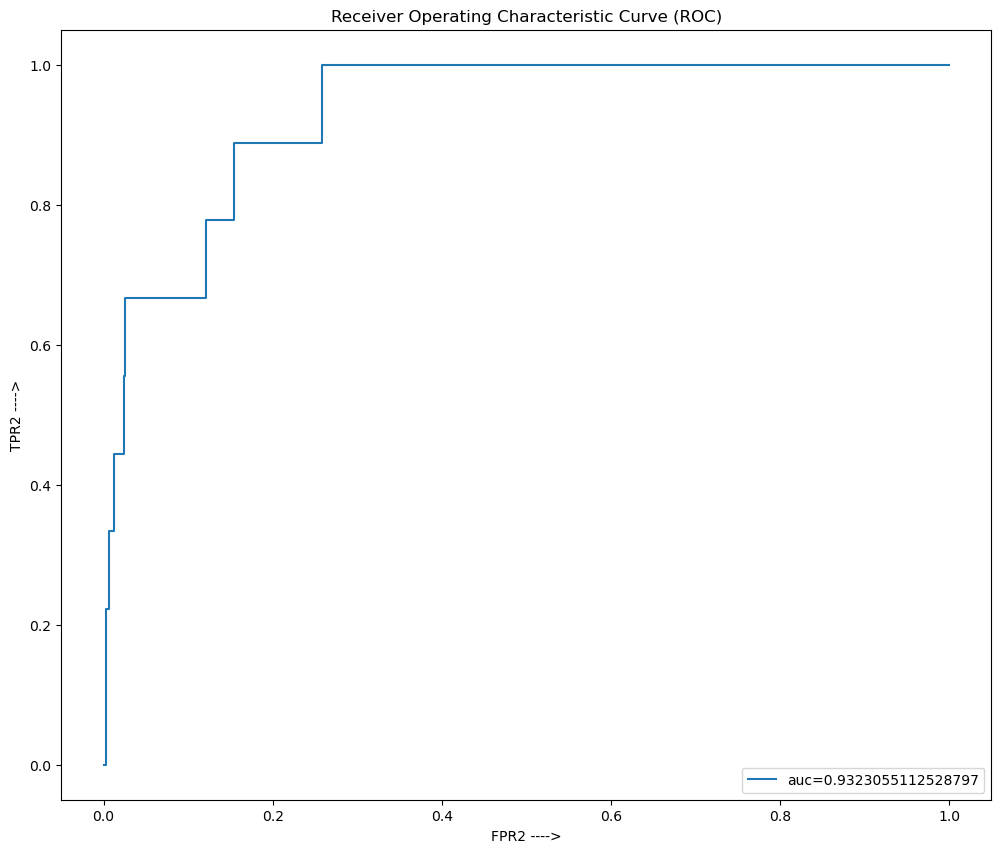

In [587]:
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr3,tpr3,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR2 ---->")
plt.ylabel("TPR2 ---->")
plt.show()

In [588]:
# model 6 SVM

C_range = list(np.arange(0.1,2,0.1))
acc_scores = []
for c in C_range:
    svm = SVC(kernel = 'linear',C = c)
    scores = cross_val_score(svm,X,y,cv = 10, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)


[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9861555608629887, 0.9861555608629887, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9848976992277686, 0.9848976992277686, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787]


Text(0, 0.5, 'Cross-Validate Accuracy')

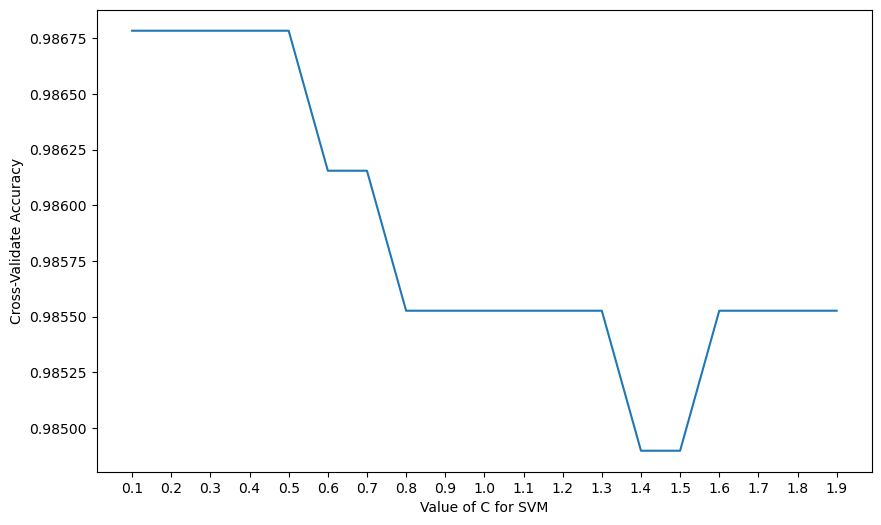

In [589]:
plt.figure(figsize = (10,6))
C_values = list(np.arange(0.1,2,0.1))
plt.plot(C_values,acc_scores)
plt.xticks(np.arange(0.1,2,0.1))
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validate Accuracy')

In [590]:
#Observation the value c can be considered as 0.5

In [591]:
#Optimising the hyper parameter gamma
gamma_range  = [0.0001,0.001,0.01,.1,1,10,100]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel = 'rbf',gamma = g)
    scores = cross_val_score(svc,X,y,cv =10,scoring = 'accuracy')
    acc_score.append(scores.mean())
print(acc_score)    


[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9861515802881937, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]


Text(0, 0.5, 'Cross-Validated Accuracy')

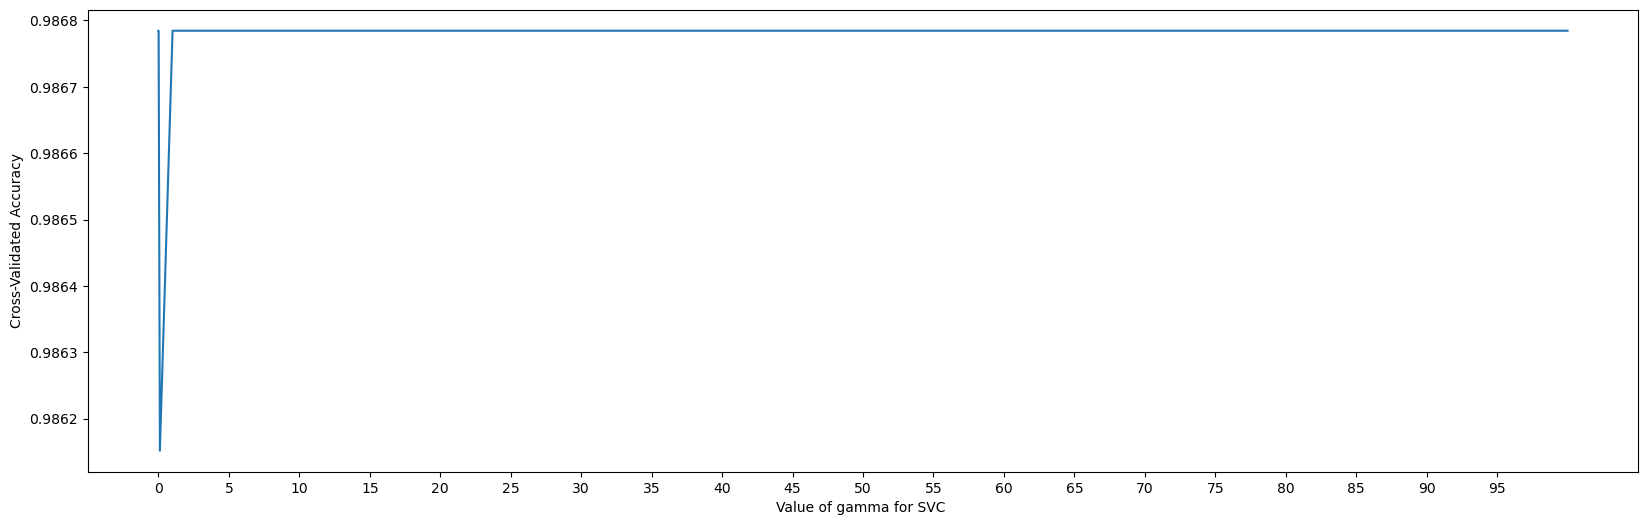

In [592]:
plt.figure(figsize = (20,6))
gamma_range = [0.0001,0.001,0.01,.1,1,10,100]
#,1,10,100
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [593]:
#Observation : degree can be taken as anyvalue since its almost same

In [594]:
# hyper parameter degree
degree_range=[2,3,4,5]
acc_scores = []
for d in degree_range:
    svc =SVC(kernel='rbf',degree= d)
    scores = cross_val_score(svc,X,y,cv= 10,scoring='accuracy')
    acc_scores.append(scores.mean())
print(acc_scores) 

[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]


Text(0, 0.5, 'Cross validation accuracy')

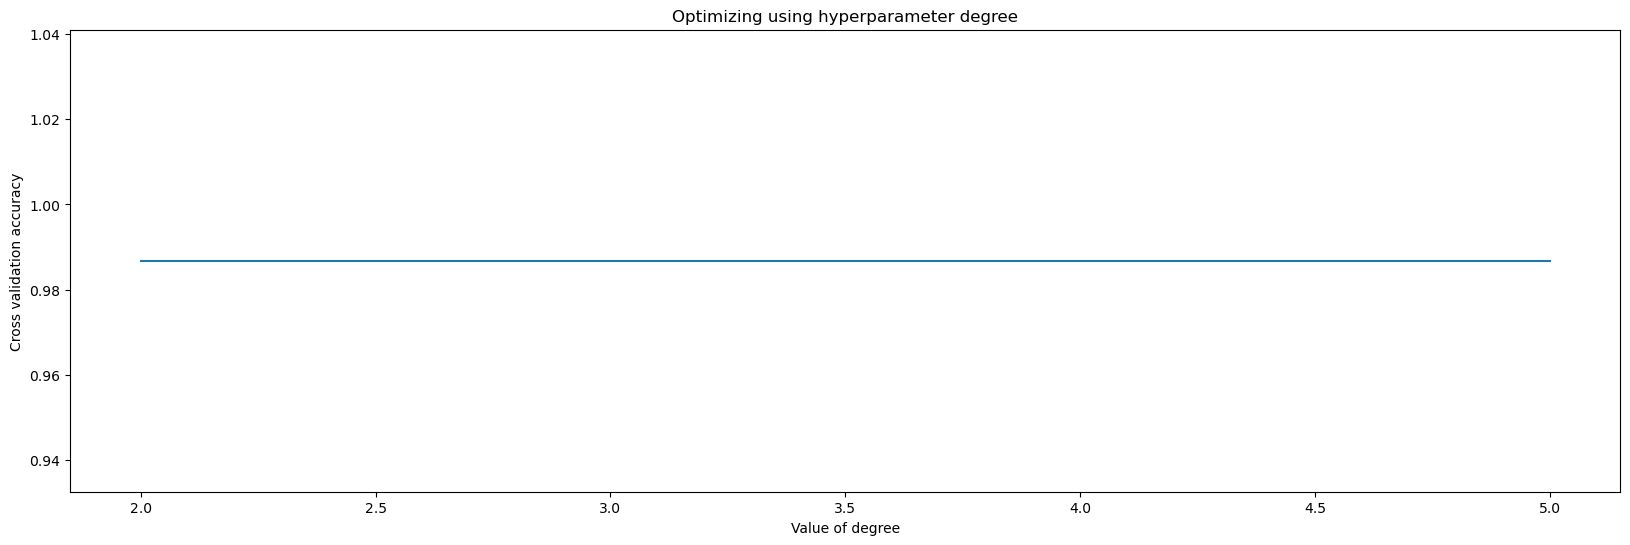

In [595]:
plt.figure(figsize = (20,6))
plt.plot(degree_range,acc_scores)
plt.title("Optimizing using hyperparameter degree")
plt.xlabel("Value of degree")
plt.ylabel("Cross validation accuracy")

In [596]:
#Observation : degree can be taken as anyvalue since its almost same

In [597]:
#Optimizing hyper parameter using GridSearchCV

#tuning the parameters
tuned_parameters = {
    'C' : [0.5],
    'degree' : [2],
    'gamma' : [0.01],
    'kernel' : ['liner','rbf','ploy']
    
}

In [598]:
model_svm = GridSearchCV(svc,tuned_parameters,cv =10,scoring = 'accuracy')
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

0.9874232456140352


In [599]:
print(model_svm.best_params_)

{'C': 0.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [600]:
#training and evaluating the model with best parameters
svc = SVC(gamma = 0.01 , C = 0.5,degree = 2,kernel = 'rbf')

In [601]:
svc_model = model_svm.fit(x_train,y_train)

In [602]:
y_pred_svc = svc_model.predict(x_test)
y_pred_svc[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [603]:
#Accuracy
accuracy_svc = metrics.accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.9858490566037735

In [604]:
#precision
precision_svc = metrics.precision_score(y_test,y_pred_svc)
precision_svc

0.0

In [605]:
#recall
recall_svc = metrics.recall_score(y_test,y_pred_svc)
recall_svc

0.0

In [606]:
#Confusion matrix
svc_con_matrix = confusion_matrix(y_test,y_pred_svc)
svc_con_matrix

array([[627,   0],
       [  9,   0]], dtype=int64)

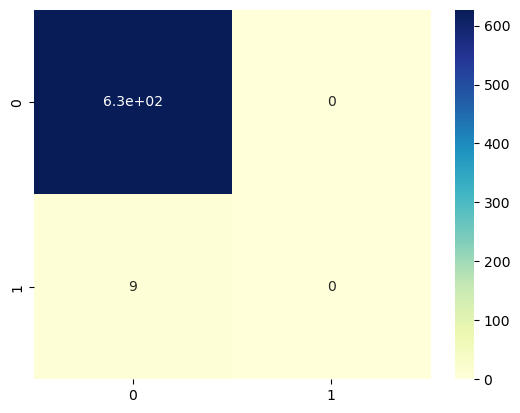

In [607]:
sns.heatmap(svc_con_matrix,annot=True, cmap="YlGnBu")
plt.show()

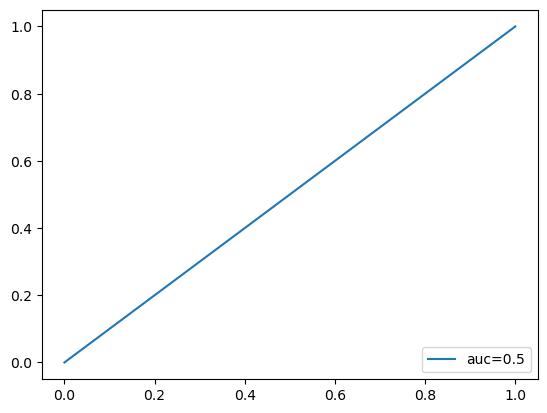

In [608]:
#AUC
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
auc_svc = roc_auc_score(y_test,y_pred_svc)
plt.plot(fpr,tpr,label = 'auc='+str(auc_svc) )
plt.legend(loc =4)
plt.show()

In [609]:
#Naive bayes algorithm
model_NB = GaussianNB()
model_NB.fit(x_train,y_train)

GaussianNB()

In [610]:
y_pred_NB = model_NB.predict(x_test)
y_pred_NB

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [611]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [612]:
#accuracy
accuracy_GNB = metrics.accuracy_score(y_test,y_pred_NB)
accuracy_GNB

0.6509433962264151

In [613]:
#precision
precision_GNB = metrics.precision_score(y_test,y_pred_NB)
precision_GNB

0.034934497816593885

In [614]:
#recall
recall_GNB = metrics.recall_score(y_test,y_pred_NB)
recall_GNB

0.8888888888888888

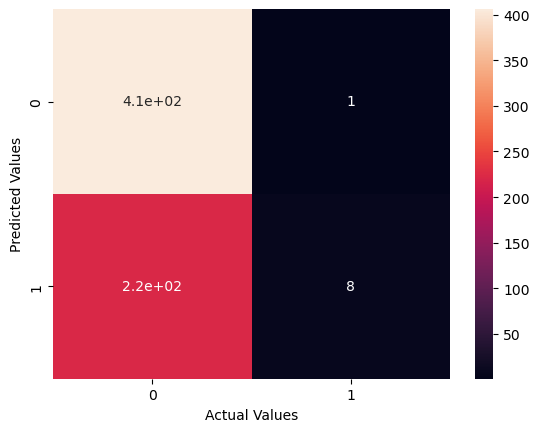

In [615]:
#Confusion matrix
Confustion_matrix_GNB = confusion_matrix(y_pred_NB,y_test)
names = np.unique(y_pred_NB)
sns.heatmap(Confustion_matrix_GNB,annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [616]:
#Classification report
print(metrics.classification_report(y_pred_NB,y_test,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       407
           1       0.89      0.03      0.07       229

    accuracy                           0.65       636
   macro avg       0.77      0.52      0.43       636
weighted avg       0.73      0.65      0.53       636



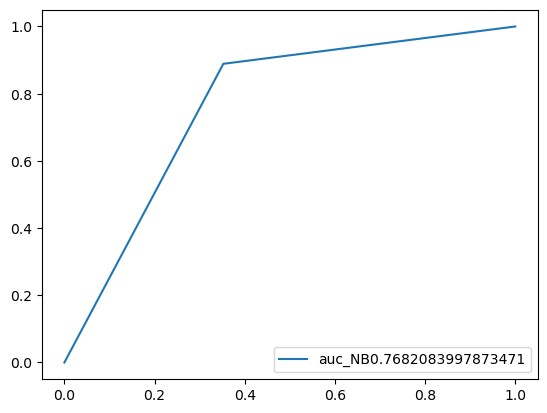

In [617]:
#AUC plot
fpr,tpr,_ = roc_curve(y_test,y_pred_NB)
auc_NB = roc_auc_score(y_test,y_pred_NB)
plt.plot(fpr,tpr,label = 'auc_NB'+str(auc_NB))
plt.legend(loc = 4)
plt.show()

In [732]:
# KNN Model
accuracy_rate = []
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(knn,X,y,cv= 10)
    accuracy_rate.append(score.mean())

for j in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = j)
    score = cross_val_score(knn,X,y,cv =10)
    error_rate.append(1-score.mean())

print(accuracy_rate)
print(error_rate)

[0.9735650027864026, 0.9836398375925484, 0.9817411034153333, 0.9848897380781786, 0.9848897380781786, 0.9855226494705838, 0.9836318764429584, 0.9861515802881937, 0.9861515802881937, 0.9867844916805988, 0.9861515802881937, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]
[0.026434997213597433, 0.01636016240745164, 0.01825889658466673, 0.01511026192182141, 0.01511026192182141, 0.014477350529416233, 0.016368123557041647, 0.013848419711806281, 0.013848419711806281, 0.013215508319401215, 0.

Text(0, 0.5, 'Accuracy Rate')

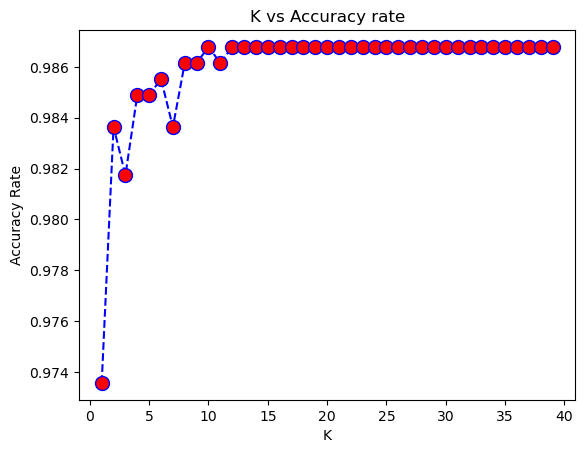

In [762]:
plt.plot(range(1,40),accuracy_rate,color='Blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10 )
plt.title("K vs Accuracy rate")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")

Text(0, 0.5, 'Error Rate')

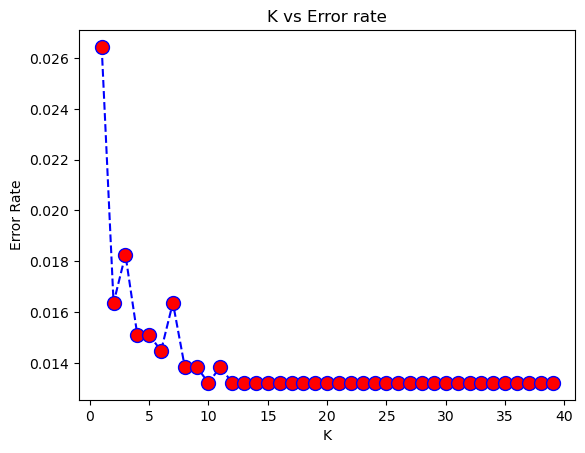

In [760]:
plt.plot(range(1,40),error_rate,color='Blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10 )
plt.title("K vs Error rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [772]:
#So K value is 12
knn = KNeighborsClassifier(n_neighbors =12)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [774]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[627,   0],
       [  9,   0]], dtype=int64)

In [778]:
classification_report_knn = classification_report(y_test,y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       627
           1       0.00      0.00      0.00         9

    accuracy                           0.99       636
   macro avg       0.49      0.50      0.50       636
weighted avg       0.97      0.99      0.98       636



Text(50.722222222222214, 0.5, 'Predicted')

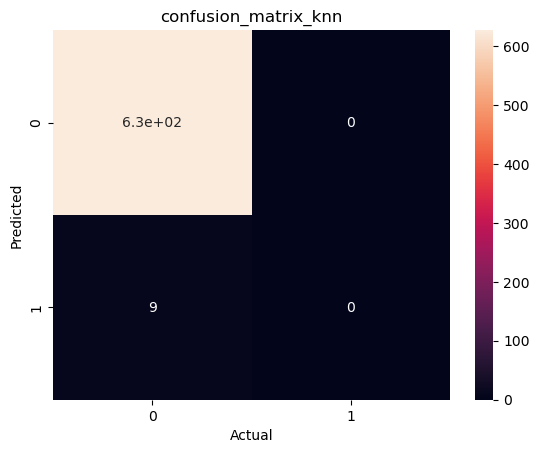

In [782]:
sns.heatmap(confusion_matrix_knn,annot =True)
plt.title("confusion_matrix_knn")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [784]:
#accuracy
accuracy_knn = metrics.accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.9858490566037735

In [786]:
#precision
precision_knn = metrics.precision_score(y_test,y_pred_knn)
precision_knn

0.0

In [788]:
#recall
recall_knn = metrics.recall_score(y_test,y_pred_knn)
recall_knn

0.0

In [790]:
#Auc
auc_knn = metrics.roc_auc_score(y_test,y_pred_knn)
auc_knn

0.5

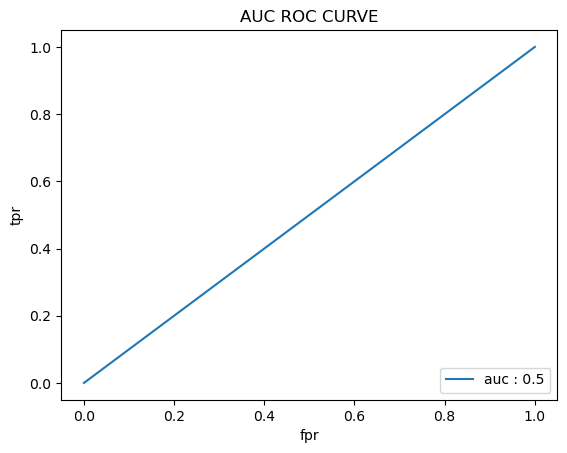

In [798]:
fpr,tpr,_ = roc_curve(y_test,y_pred_knn)
plt.plot(fpr,tpr,label = "auc : "+str(auc_knn))
plt.legend(loc = 4)
plt.title("AUC ROC CURVE")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [800]:
data = [[accuracy_logreg,precision_logreg, recall_logreg,auc_logreg],
        [accuracy_dt,precision_dt, recall_dt,auc_dt],
        [accuracy_rf,precision_rf, recall_rf,auc_rf],
        [acuraccy_gb,precision_gb, recall_gb,auc_gb],
       [accuracy_svc,precision_svc, recall_svc,auc_svc],
       [accuracy_GNB,precision_GNB, recall_GNB,auc_NB],
       [accuracy_knn,precision_knn, recall_knn,auc_knn]]
result_df = pd.DataFrame(data,columns=["Accuracy","Precision","Recall","AUC"],
                         index=['LogisticRegression','DecisionTree','RandomForest',
                              'GradientBoost','SVM','Naive Bayes','KNN'])

In [802]:
result_df

Accuracy  Precision    Recall       AUC
LogisticRegression  0.992138   1.000000  0.285714  0.926641
DecisionTree        0.988994   0.000000  0.000000  0.680445
RandomForest        0.987421   1.000000  0.111111  0.879940
GradientBoost       0.982704   0.000000  0.000000  0.932306
SVM                 0.985849   0.000000  0.000000  0.500000
Naive Bayes         0.650943   0.034934  0.888889  0.768208
KNN                 0.985849   0.000000  0.000000  0.500000

Conclusion
From above models, only Logistic Regression, RandomForest  and Naive Bayes has recall and precision values. So from these32 models, we will choose LogisticRegression as its accuracy ismore %